# Churn Prediction ([Kaggle](https://www.kaggle.com/c/introduction-to-data-science-nyu-spring-2018/))

---

- Check Readme for description. 

## Install dependencies

In [1]:
#Metadata
%load_ext watermark
%watermark -a "Vutsal Singhal" -p numpy,pandas,matplotlib,sklearn -u -n -t -z -m

Vutsal Singhal 
last updated: Wed Feb 21 2018 14:35:59 EST

numpy 1.13.3
pandas 0.20.3
matplotlib 2.1.0
sklearn 0.19.0

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.13.0-32-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('data/train.csv')

In [6]:
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,1
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INCOME,18000.0,80351.592000,41708.768449,20007.0,42253.00,75270.5,116209.25,159983.0
OVERAGE,18000.0,86.066111,86.028338,-2.0,0.00,59.0,179.00,335.0
LEFTOVER,18000.0,23.853889,26.824476,0.0,0.00,14.0,41.00,89.0
HOUSE,18000.0,492312.417389,252089.803831,150002.0,262920.75,451299.0,701615.75,999996.0
HANDSET_PRICE,18000.0,390.519722,214.008683,130.0,220.00,327.0,535.25,899.0
OVER_15MINS_CALLS_PER_MONTH,18000.0,7.990333,8.919965,0.0,1.00,4.0,15.00,29.0
AVERAGE_CALL_DURATION,18000.0,6.008944,4.404612,1.0,2.00,5.0,10.00,15.0
LEAVE,18000.0,0.507389,0.499959,0.0,0.00,1.0,1.00,1.0


## Label encoding nominal fields

In [8]:
mapCOLLEGE                    = {label:idx for idx,label in enumerate(['zero','one'])}
mapREPORTED_SATISFACTION      = {label:idx for idx,label in enumerate(['very_sat', 'sat', 'avg', 'unsat', 'very_unsat'])}
mapREPORTED_USAGE_LEVEL       = {label:idx for idx,label in enumerate(['very_high','high','avg', 'little','very_little'])}
mapCONSIDERING_CHANGE_OF_PLAN = {label:idx for idx,label in enumerate(['never_thought', 'no', 'considering', 'perhaps', 'actively_looking_into_it'])}

In [9]:
df['COLLEGE']                    = df['COLLEGE'].map(mapCOLLEGE)
df['REPORTED_SATISFACTION']      = df['REPORTED_SATISFACTION'].map(mapREPORTED_SATISFACTION)
df['REPORTED_USAGE_LEVEL']       = df['REPORTED_USAGE_LEVEL'].map(mapREPORTED_USAGE_LEVEL)
df['CONSIDERING_CHANGE_OF_PLAN'] = df['CONSIDERING_CHANGE_OF_PLAN'].map(mapCONSIDERING_CHANGE_OF_PLAN)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COLLEGE,18000.0,0.503389,0.500002,0.0,0.00,1.0,1.00,1.0
INCOME,18000.0,80351.592000,41708.768449,20007.0,42253.00,75270.5,116209.25,159983.0
OVERAGE,18000.0,86.066111,86.028338,-2.0,0.00,59.0,179.00,335.0
LEFTOVER,18000.0,23.853889,26.824476,0.0,0.00,14.0,41.00,89.0
HOUSE,18000.0,492312.417389,252089.803831,150002.0,262920.75,451299.0,701615.75,999996.0
HANDSET_PRICE,18000.0,390.519722,214.008683,130.0,220.00,327.0,535.25,899.0
OVER_15MINS_CALLS_PER_MONTH,18000.0,7.990333,8.919965,0.0,1.00,4.0,15.00,29.0
AVERAGE_CALL_DURATION,18000.0,6.008944,4.404612,1.0,2.00,5.0,10.00,15.0
REPORTED_SATISFACTION,18000.0,2.437111,1.630942,0.0,0.00,3.0,4.00,4.0
REPORTED_USAGE_LEVEL,18000.0,2.183500,1.513260,0.0,0.00,3.0,3.00,4.0


In [11]:
df.corr(method='pearson')

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
COLLEGE,1.000000,0.013834,-0.001998,-0.004238,-0.004234,0.012381,-0.009086,-0.002171,-0.007199,-0.000345,-0.013002,-0.015436
INCOME,0.013834,1.000000,0.002628,0.006930,-0.009309,0.725662,0.004128,-0.005496,-0.002529,-0.002913,0.000281,-0.097832
OVERAGE,-0.001998,0.002628,1.000000,-0.003809,0.001570,0.003689,0.771036,0.002241,0.022151,0.002432,0.011492,-0.232061
LEFTOVER,-0.004238,0.006930,-0.003809,1.000000,0.006328,0.003942,-0.010942,-0.658231,-0.004944,0.008600,0.012016,-0.060279
HOUSE,-0.004234,-0.009309,0.001570,0.006328,1.000000,-0.007647,0.005354,-0.010259,0.003954,-0.008636,-0.009324,0.210863
HANDSET_PRICE,0.012381,0.725662,0.003689,0.003942,-0.007647,1.000000,0.005041,-0.005146,-0.007521,0.001996,0.000030,-0.091972
OVER_15MINS_CALLS_PER_MONTH,-0.009086,0.004128,0.771036,-0.010942,0.005354,0.005041,1.000000,0.009526,0.017457,-0.002128,0.009097,-0.198505
AVERAGE_CALL_DURATION,-0.002171,-0.005496,0.002241,-0.658231,-0.010259,-0.005146,0.009526,1.000000,0.000856,-0.011424,-0.007097,0.006744
REPORTED_SATISFACTION,-0.007199,-0.002529,0.022151,-0.004944,0.003954,-0.007521,0.017457,0.000856,1.000000,0.000208,0.008266,-0.010298
REPORTED_USAGE_LEVEL,-0.000345,-0.002913,0.002432,0.008600,-0.008636,0.001996,-0.002128,-0.011424,0.000208,1.000000,0.008889,-0.002196


In [12]:
X,y = df.loc[:, df.columns != 'LEAVE'], df.loc[:, df.columns == 'LEAVE']
X.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,0,31953,0,6,313378,161,0,4,3,3,1
1,1,36147,0,13,800586,244,0,6,3,3,2
2,1,27273,230,0,305049,201,16,15,3,4,3
3,0,120070,38,33,788235,780,3,2,3,0,2
4,1,29215,208,85,224784,241,21,1,4,3,0


## Train-test spilt

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0,stratify=y)

## Normalizing features

In [14]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm  = mms.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
X_train_norm_df = pd.DataFrame(X_train_norm,columns=df.columns[df.columns != 'LEAVE'])
X_test_norm_df  = pd.DataFrame(X_test_norm,columns=df.columns[df.columns != 'LEAVE'])

## Standardizing features

In [16]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std  = stdsc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [17]:
X_train_std_df = pd.DataFrame(X_train_std,columns=df.columns[df.columns != 'LEAVE'])
X_test_std_df  = pd.DataFrame(X_test_std,columns=df.columns[df.columns != 'LEAVE'])

In [18]:
X_train_std_df.describe()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
count,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04,1.530000e+04
mean,1.491908e-17,-7.006741e-17,3.088597e-16,1.577823e-16,1.044771e-16,-1.224874e-17,-1.445249e-16,-8.133218e-16,5.271455e-16,3.211665e-17,5.768951e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.004980e+00,-1.445290e+00,-9.984945e-01,-8.855743e-01,-1.355580e+00,-1.221014e+00,-8.944702e-01,-1.143030e+00,-1.497069e+00,-1.445082e+00,-1.683728e+00
25%,-1.004980e+00,-9.139354e-01,-9.984945e-01,-8.855743e-01,-9.119000e-01,-8.001027e-01,-7.823683e-01,-9.161563e-01,-1.497069e+00,-1.445082e+00,-9.002891e-01
50%,9.950450e-01,-1.234612e-01,-3.118898e-01,-3.630022e-01,-1.690944e-01,-2.996858e-01,-4.460628e-01,-2.355339e-01,3.429489e-01,5.350733e-01,-1.168502e-01
75%,9.950450e-01,8.604995e-01,1.084594e+00,6.448155e-01,8.368421e-01,6.777639e-01,7.870576e-01,8.988368e-01,9.562882e-01,5.350733e-01,6.665887e-01
max,9.950450e-01,1.905174e+00,2.900024e+00,2.436491e+00,2.012015e+00,2.375440e+00,2.356483e+00,2.033207e+00,9.562882e-01,1.195125e+00,1.450028e+00


In [19]:
X_train_std_df.corr(method='pearson')

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
COLLEGE,1.000000,0.016451,-0.003923,-0.008803,-0.004963,0.017777,-0.009147,0.001084,-0.009321,-0.001268,-0.018093
INCOME,0.016451,1.000000,0.002028,0.007072,-0.012456,0.723891,0.003201,-0.006762,-0.006292,0.001113,-0.002013
OVERAGE,-0.003923,0.002028,1.000000,-0.012437,-0.002461,0.004478,0.771352,0.007409,0.022556,-0.001994,0.010284
LEFTOVER,-0.008803,0.007072,-0.012437,1.000000,0.008248,0.001612,-0.014931,-0.658290,-0.004358,0.011769,0.015918
HOUSE,-0.004963,-0.012456,-0.002461,0.008248,1.000000,-0.008065,0.004285,-0.010098,0.009718,-0.008664,-0.007196
HANDSET_PRICE,0.017777,0.723891,0.004478,0.001612,-0.008065,1.000000,0.007368,-0.002888,-0.008801,0.004923,-0.003434
OVER_15MINS_CALLS_PER_MONTH,-0.009147,0.003201,0.771352,-0.014931,0.004285,0.007368,1.000000,0.011246,0.017819,-0.006255,0.007702
AVERAGE_CALL_DURATION,0.001084,-0.006762,0.007409,-0.658290,-0.010098,-0.002888,0.011246,1.000000,0.001133,-0.008423,-0.013280
REPORTED_SATISFACTION,-0.009321,-0.006292,0.022556,-0.004358,0.009718,-0.008801,0.017819,0.001133,1.000000,0.003304,0.012216
REPORTED_USAGE_LEVEL,-0.001268,0.001113,-0.001994,0.011769,-0.008664,0.004923,-0.006255,-0.008423,0.003304,1.000000,0.001079


## Assessing feature importance

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
feat_labels = X.columns
forest      = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train.values.ravel())

importances = forest.feature_importances_
indices     = np.argsort(importances)[::-1]

In [22]:
for f in range(X_train.shape[1]):
    print("%d) %-*s %f" % (f+1, 30,feat_labels[indices[f]], importances[indices[f]]))

1) HOUSE                          0.211508
2) INCOME                         0.151801
3) HANDSET_PRICE                  0.133486
4) OVERAGE                        0.127137
5) LEFTOVER                       0.092757
6) OVER_15MINS_CALLS_PER_MONTH    0.079165
7) AVERAGE_CALL_DURATION          0.064393
8) CONSIDERING_CHANGE_OF_PLAN     0.041808
9) REPORTED_USAGE_LEVEL           0.040218
10) REPORTED_SATISFACTION          0.038492
11) COLLEGE                        0.019236


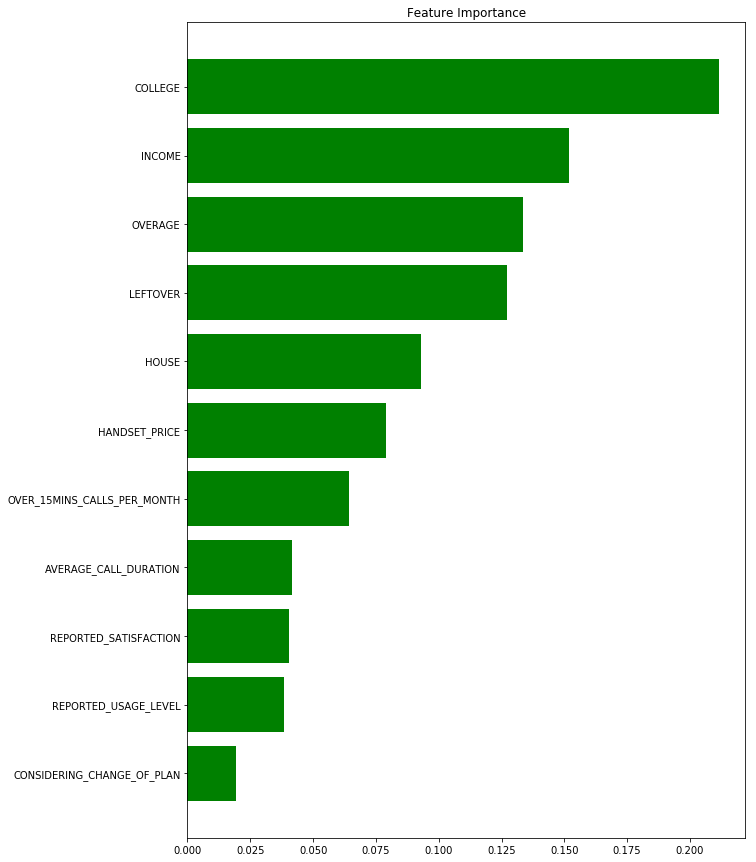

In [23]:
fig = plt.figure(figsize=(10, 15))
plt.title('Feature Importance')
plt.barh(range(X_train.shape[1]), importances[indices], align='center', color='green', ecolor='black')
plt.yticks(range(X_train.shape[1]), feat_labels, rotation=0)
plt.gca().invert_yaxis()
plt.show()

## Using SVM

In [24]:
from sklearn.svm import SVC

svc   = SVC(kernel='rbf', C=1, random_state=1, gamma=0.2)
y_rbf = svc.fit(X_train_std_df.iloc[:,1:5], y_train.values.ravel())

print('Training accuracy:', y_rbf.score(X_train_std_df.iloc[:,1:5], y_train.values.ravel()))
print('Test accuracy:', y_rbf.score(X_test_std_df.iloc[:,1:5], y_test.values.ravel()))

Training accuracy: 0.6832679738562092
Test accuracy: 0.6881481481481482


## Using Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3, max_features=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0,presort=False, random_state=100, splitter='best')
tree.fit(X_train_std_df.iloc[:,1:5], y_train.values.ravel())

print('Training accuracy:', tree.score(X_train_std_df.iloc[:,1:5], y_train.values.ravel()))
print('Test accuracy:', tree.score(X_test_std_df.iloc[:,1:5], y_test.values.ravel()))

Training accuracy: 0.7026143790849673
Test accuracy: 0.7074074074074074


## Using Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=10e-2)
lr.fit(X_train_std_df,y_train.values.ravel())

print('Training accuracy:',lr.score(X_train_std_df, y_train.values.ravel()))
print('Test accuracy:',lr.score(X_test_std_df, y_test.values.ravel()))

Training accuracy: 0.6408496732026144
Test accuracy: 0.6474074074074074


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Finding test results

In [29]:
test_data = pd.read_csv('data/test.csv')

In [30]:
test_data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,one,142806,202,0,264371,562,29,13,very_unsat,very_little,actively_looking_into_it
1,zero,41532,66,45,619188,190,3,2,unsat,high,actively_looking_into_it
2,zero,51919,191,61,986348,355,21,1,avg,very_little,no
3,one,32732,0,0,255165,301,1,10,avg,very_high,considering
4,zero,40412,0,0,246803,239,26,8,very_unsat,little,perhaps


In [31]:
test_data['COLLEGE']                    = test_data['COLLEGE'].map(mapCOLLEGE)
test_data['REPORTED_SATISFACTION']      = test_data['REPORTED_SATISFACTION'].map(mapREPORTED_SATISFACTION)
test_data['REPORTED_USAGE_LEVEL']       = test_data['REPORTED_USAGE_LEVEL'].map(mapREPORTED_USAGE_LEVEL)
test_data['CONSIDERING_CHANGE_OF_PLAN'] = test_data['CONSIDERING_CHANGE_OF_PLAN'].map(mapCONSIDERING_CHANGE_OF_PLAN)

In [32]:
test_data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN
0,1,142806,202,0,264371,562,29,13,4,4,4
1,0,41532,66,45,619188,190,3,2,3,1,4
2,0,51919,191,61,986348,355,21,1,2,4,1
3,1,32732,0,0,255165,301,1,10,2,0,2
4,0,40412,0,0,246803,239,26,8,4,3,3


In [34]:
test_data_std = stdsc.transform(test_data)
test_data_std

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.99504496,  1.49402537,  1.35225375, ...,  0.95628815,
         1.19512501,  1.45002767],
       [-1.00497972, -0.93006822, -0.23042825, ...,  0.34294886,
        -0.78503013,  1.45002767],
       [-1.00497972, -0.68144508,  1.2242427 , ..., -0.27039043,
         1.19512501, -0.90028909],
       ...,
       [-1.00497972, -0.04450835, -0.99849451, ...,  0.34294886,
        -1.44508184, -0.11685017],
       [-1.00497972, -0.04103763, -0.45153823, ...,  0.95628815,
         0.53507329, -0.11685017],
       [-1.00497972,  1.0605685 , -0.99849451, ...,  0.34294886,
        -0.78503013,  1.45002767]])

In [35]:
test_predictions = tree.predict(test_data_std[:,1:5])

In [36]:
test_predictions

array([0, 1, 1, ..., 0, 0, 1])